# 1. Train 전처리

In [337]:
import pandas as pd

titanic_df=pd.read_csv('train.csv')

In [338]:
# 결측값 처리 코드
titanic_df['Cabin']=titanic_df['Cabin'].fillna('Z00')
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())

In [339]:
one_class=titanic_df[titanic_df['Pclass']==1]['Fare'].mean()
two_class=titanic_df[titanic_df['Pclass']==2]['Fare'].mean()

In [340]:
# fare가 0인값 처리 : 각 등급의 평균 가격으로 대체
titanic_df.loc[(titanic_df['Fare'] == 0) & (titanic_df['Pclass'] == 1), 'Fare'] = one_class
titanic_df.loc[(titanic_df['Fare'] == 0) & (titanic_df['Pclass'] == 2), 'Fare'] = two_class
titanic_df.loc[(titanic_df['Fare'] == 0) & (titanic_df['Pclass'] == 3), 'Fare'] = 0

In [341]:
# cabin_count변수 추가
titanic_df['Cabin_count']=titanic_df['Cabin'].str.split(' ').apply(lambda x:len(x))

In [342]:
titanic_df['Fare_1']=titanic_df['Fare']/titanic_df['Cabin_count']

In [343]:
count=titanic_df.groupby('Ticket')['Name'].count().reset_index().rename(columns={'Name':'Ticket_count'})

In [344]:
titanic_df=pd.merge(titanic_df,count,on='Ticket',how='left')

In [345]:
titanic_df['Alone'] = 0  # Initialize the 'Alone' column with 0
titanic_df.loc[(titanic_df['Ticket_count']<=1) & (titanic_df['SibSp'] < 1) & (titanic_df['Parch'] < 1), 'Alone'] = 1

In [346]:
# 데이터프레임에 새로운 열로 추가
titanic_df['Cabin_Category'] = titanic_df['Cabin'].str[0]

In [347]:
titanic_df['Cabin_Category']=titanic_df['Cabin_Category'].apply(lambda x: 'A' if x=='T' else x)

In [348]:
titanic_df['Sex_score']=titanic_df['Sex'].apply(lambda x:20 if x=="male" else 70)
titanic_df['Pclass_score']=titanic_df['Pclass'].apply(lambda x:60 if x==1 else 45 if x==2 else 25)
titanic_df['Age_score']=titanic_df['Age'].apply(lambda x:55 if x<=16 else 35)

titanic_df['Score']=titanic_df['Sex_score']+titanic_df['Pclass_score']+titanic_df['Age_score']

In [349]:
titanic_df=titanic_df.drop(['Sex_score','Pclass_score','Age_score','Cabin_count'],axis=1)

# 2. Test 전처리

In [350]:
import pandas as pd

test=pd.read_csv('test.csv')

In [351]:
# 결측값 처리 코드
test['Cabin']=test['Cabin'].fillna('Z00')
test['Embarked']=test['Embarked'].fillna('S')
test['Age']=test['Age'].fillna(test['Age'].median())

In [352]:
test['Fare']=test['Fare'].fillna(7.8958)

In [353]:
# fare가 0인값 처리 : 각 등급의 평균 가격으로 대체
test.loc[(test['Fare'] == 0) & (test['Pclass'] == 1), 'Fare'] = one_class
test.loc[(test['Fare'] == 0) & (test['Pclass'] == 2), 'Fare'] = two_class
test.loc[(test['Fare'] == 0) & (test['Pclass'] == 3), 'Fare'] = 0

In [354]:
# cabin_count변수 추가
test['Cabin_count']=test['Cabin'].str.split(' ').apply(lambda x:len(x))

In [355]:
test['Fare_1']=test['Fare']/test['Cabin_count']

In [356]:
count=test.groupby('Ticket')['Name'].count().reset_index().rename(columns={'Name':'Ticket_count'})

In [357]:
test=pd.merge(test,count,on='Ticket',how='left')

In [358]:
test['Alone'] = 0  # Initialize the 'Alone' column with 0
test.loc[(test['Ticket_count']<=1) & (test['SibSp'] < 1) & (test['Parch'] < 1), 'Alone'] = 1

In [359]:
# 데이터프레임에 새로운 열로 추가
test['Cabin_Category'] = test['Cabin'].str[0]

In [360]:
test['Cabin_Category']=test['Cabin_Category'].apply(lambda x: 'A' if x=='T' else x)

In [361]:
test['Sex_score']=test['Sex'].apply(lambda x:20 if x=="male" else 70)
test['Pclass_score']=test['Pclass'].apply(lambda x:60 if x==1 else 45 if x==2 else 25)
test['Age_score']=test['Age'].apply(lambda x:55 if x<=16 else 35)

test['Score']=test['Sex_score']+test['Pclass_score']+test['Age_score']

In [362]:
test=test.drop(['Sex_score','Pclass_score','Age_score','Cabin_count'],axis=1)

# 모델

In [363]:
df=titanic_df

In [364]:
df=df.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

In [365]:
df['Pclass']=df['Pclass'].astype('object')
df['Alone']=df['Alone'].astype('object')

In [367]:
X=df.drop(['Survived'],axis=1)

y=df['Survived']

In [368]:
X = pd.get_dummies(X)

(891, 24)


C:\Users\USER\AppData\Local\Temp\ipykernel_7836\1212540564.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
C:\Users\USER\AppData\Local\Temp\ipykernel_7836\1212540564.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)


In [369]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터 스케일링
data_scaled = scaler.fit_transform(X)

In [370]:
#test
test=test.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

In [372]:
test['Pclass']=test['Pclass'].astype('object')
test['Alone']=test['Alone'].astype('object')

In [373]:
X_test = pd.get_dummies(test)

(418, 24)


C:\Users\USER\AppData\Local\Temp\ipykernel_7836\1683390249.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test = pd.get_dummies(test)
C:\Users\USER\AppData\Local\Temp\ipykernel_7836\1683390249.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test = pd.get_dummies(test)


In [374]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터 스케일링
data_scaled_test = scaler.fit_transform(X_test)

In [375]:
from sklearn.model_selection import train_test_split
# 데이터를 학습용과 테스트용으로 나누기
X_train, X_val, y_train, y_val = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

In [377]:
# 필요한 라이브러리 가져오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_val, y_train, y_val = train_test_split(data_scaled, y, test_size=0.2, random_state=42)


# 랜덤 포레스트 모델 생성
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=123,
                                       max_depth = 10, min_samples_split=5)

# 모델 학습
rf_classifier.fit(X_train, y_train)

# 모델 예측
y_pred = rf_classifier.predict(X_val)


# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print("정확도: ", accuracy)

# F1 점수 계산
f1 = f1_score(y_val, y_pred)
print("F1 점수:", f1)

정확도:  0.8268156424581006
F1 점수: 0.7801418439716312


In [378]:
pred=rf_classifier.predict(data_scaled_test)

In [379]:
submission=pd.read_csv('submission.csv')
submission['Survived']=pred

In [380]:
submission.to_csv('submission1.csv',index=False)

Score: 0.232584301274553
Sex_female: 0.12456862606734927
Fare_1: 0.11967780759166076
Age: 0.10533933913577564
Sex_male: 0.10200544482619214
Ticket_count: 0.0471332151307076
Pclass_3: 0.038051771364030186
Cabin_Category_Z: 0.03518919133636297
SibSp: 0.03150256262193386
Pclass_1: 0.022517362128743897
Parch: 0.021455505513664652
Pclass_2: 0.017421094990972656
Embarked_S: 0.014634818167713263
Embarked_C: 0.014118893436675618
Alone_0: 0.013415880135202039
Cabin_Category_B: 0.012438754571465394
Cabin_Category_E: 0.012423895970165308
Alone_1: 0.01077506638781009
Embarked_Q: 0.007459850608548493
Cabin_Category_D: 0.006263274092664032
Cabin_Category_C: 0.005212048880775667
Cabin_Category_G: 0.0021031103878214573
Cabin_Category_A: 0.002054826820291136
Cabin_Category_F: 0.0016533585589209514


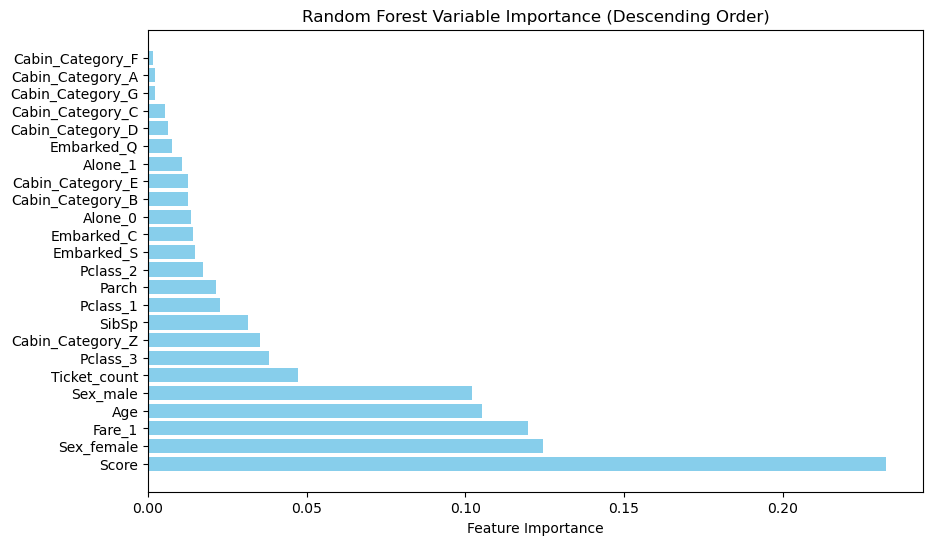

In [381]:
import matplotlib.pyplot as plt
import seaborn as sns
# 변수 중요도를 얻습니다
importances = rf_classifier.feature_importances_
feature_names = X.columns
# 변수 중요도를 내림차순으로 정렬합니다
sorted_indices = (-importances).argsort()
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# 중요도를 변수 이름과 함께 출력합니다
for feature, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{feature}: {importance}")

# 중요도를 그래프로 시각화합니다
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center',color='skyblue')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Variable Importance (Descending Order)')
plt.show()